In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
train_dir = '/home/a/datasets/mnist_png_augm/training'
validation_dir = '/home/a/datasets/mnist_png_augm/testing'

In [3]:
train_dataset = image_dataset_from_directory(train_dir,
                                            shuffle=False,
                                            batch_size=1,
                                            image_size=(28,28))

Found 10 files belonging to 10 classes.


In [4]:
# interpolation='bilinear'
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.04, interpolation='bilinear'), # 15°  2pi * 0.04 -> rad
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1,  # %
                                                                 width_factor=0.2,
                                                                 interpolation='nearest'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.15,
                                                          width_factor=0.15,
                                                          interpolation='bilinear')
])

In [5]:
num = 9

In [6]:
def demo(train_dataset, num):
    for image, lab in train_dataset: 
        if lab[0].numpy() == num:
            first_img = image[0]
            plt.figure(figsize=(4,3))
            plt.imshow(first_img / 255)
            plt.figure(figsize=(10,10))
            for i in range(9):
                plt.subplot(3, 3, i + 1)
                augm_img = data_augmentation(np.expand_dims(first_img, 0))
                plt.imshow(augm_img[0] / 255)

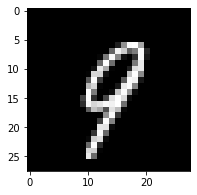

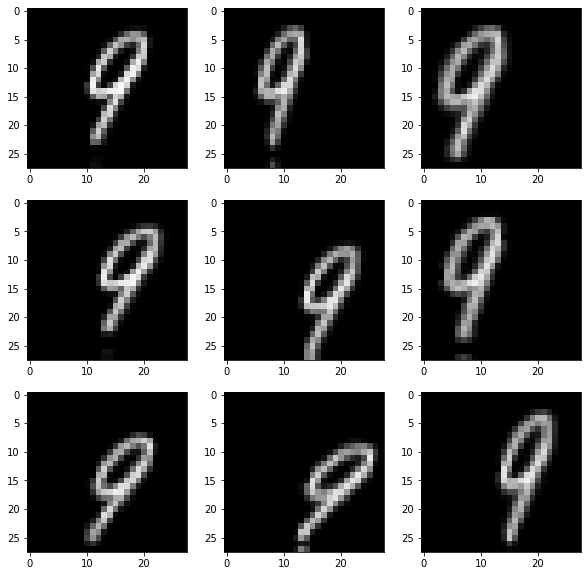

In [7]:
demo(train_dataset, num)

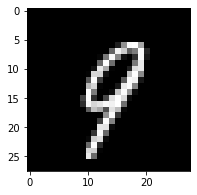

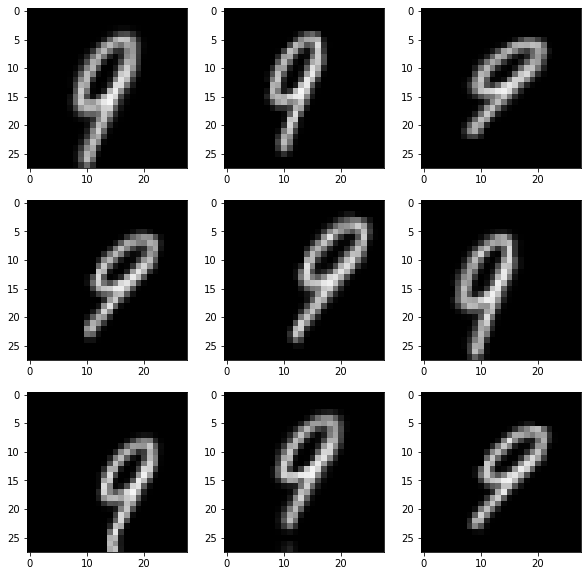

In [8]:
demo(train_dataset, num)